In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import Functions.PCA as pca
import Functions.data_load as dat
import Functions.visualization as vis
import Functions.average_img as avg
import Functions.k_nearest as knn

#load data
train_array, test_array = dat.load_data()
cleaned_arr = dat.clean_train_arr()
z_arr = pca.z_arr(cleaned_arr)
val_arr = dat.load_val_arr()

In [2]:
pca.arr_only(z_arr, pca.create_sorted_eigenvec(30))

numpy.ndarray

In [2]:
train_arr_cleaned_df = pd.read_csv("data/pca/cleaned_train_array.csv", header = None)
train_arr_cleaned = train_arr_cleaned_df.to_numpy()

In [11]:
z_array = pca.z_arr(train_arr_cleaned)

df = pd.DataFrame(z_array)
df.to_csv('data/pca/z_array.csv', index=None, header=None)

In [12]:
knn.kNN(train_array, pca.arr_only(pca.z_arr(cleaned_arr), pca.create_sorted_eigenvec(30)), pca.image_only(z_arr[2,:], pca.create_sorted_eigenvec(30)), 5, train=True)

NameError: name 'knn' is not defined

In [19]:
def validation_kNN_train(s_size, k=5, PC=30):
    true = 0
    false = 0
    eigenvectors_sorted = pca.create_sorted_eigenvec(PC)
    pca_arr = pca.arr_only(z_arr, eigenvectors_sorted)
    
    for i in range(0, s_size):

        z_image = z_arr[29500+i, :]
        pca_img = pca.image_only(z_image, eigenvectors_sorted)


        result_kNN = knn.kNN(train_array, pca_arr, pca_img, k, train=True)
        if result_kNN == train_array[29500+i, 0]:
            true += 1
        else:
            false += 1

    return print(f'Anzahl richtig erkannter Digits: {true}\n\
Anzahl falsch erkannter Digits: {false}\n\
\nAnteil richtiger Vorhersagen: {(true/s_size)*100}%')

In [8]:
knn.validation_kNN_train(1000, k=10, PC = 7)

Anzahl richtig erkannter Digits: 847
Anzahl falsch erkannter Digits: 153

Anteil richtiger Vorhersagen: 84.7%


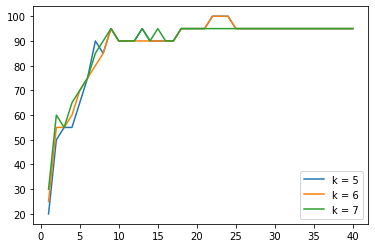

In [27]:
val_arr1[:,0]
PCs = list(range(1, 41))
plt.plot(PCs, val_arr1[:,0], label = "k = 5")
plt.plot(PCs, val_arr1[:,1], label = "k = 6")
plt.plot(PCs, val_arr1[:,2], label = "k = 7")
plt.legend()

In [7]:
#5:50 mit 10
#8:50 mit 20
val_arr = np.zeros((30, 10))
for i in range(1, 31):
    for j in range(1, 11):
        val_arr[i-1, j-1] = knn.validation_kNN_train_matrix(1000, k=j, PC=i)
val_arr

df = pd.DataFrame(val_arr)

df.to_csv('data/val_array2.csv', index=None, header=None)


In [5]:
val_arr

array([[23.9, 24.6, 24.7, 24.7, 26.1, 26. , 26.7, 27. , 27.3, 27.1],
       [37.9, 38.4, 39.5, 40.2, 42.7, 42.5, 42.8, 42.3, 44.1, 43.8],
       [42.9, 43.5, 45.6, 45.9, 46.6, 48.1, 47.4, 47.5, 48. , 48.1],
       [53.8, 54.8, 58.6, 58. , 58.6, 59.8, 59.8, 60. , 60.6, 61.8],
       [66.2, 65.9, 69.5, 70.8, 71. , 71.8, 72.2, 71.9, 72. , 72.2],
       [76.2, 75.9, 79.3, 80.4, 79.7, 80.8, 80.9, 81.8, 81.6, 81.2],
       [81.5, 81.6, 84. , 84.5, 84.3, 84.5, 84.7, 84.8, 85.4, 84.7],
       [86.4, 86.4, 88.1, 88.9, 88.3, 89.3, 88.9, 88.4, 88.3, 88.4],
       [87.6, 87.5, 89.4, 89.7, 90.1, 90.4, 90.2, 90.2, 89.8, 90.1],
       [90.3, 90.1, 91.7, 92.5, 92.7, 92.4, 92.3, 92.5, 92.1, 92.2],
       [91. , 91.3, 92.5, 92.5, 93.2, 92.6, 93.2, 93.4, 92.8, 92.6],
       [93.2, 93.2, 93.8, 94.5, 94.2, 94.5, 94. , 94. , 93.9, 93.6],
       [94.4, 94.5, 95. , 95.2, 95.1, 95.2, 95. , 94.9, 94.6, 94.7],
       [95. , 95.2, 94.8, 95.4, 95.6, 95.6, 95.2, 95.2, 94.8, 94.8],
       [94.8, 94.4, 95.4, 95.6, 95

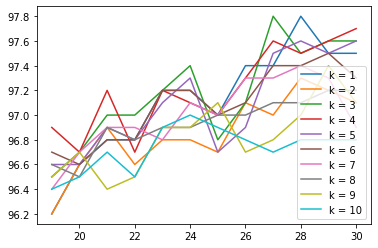

In [19]:
PCs = list(range(19, 31))
for i in range(0,10):
    plt.plot(PCs, val_arr[18:30 ,i], label = f"k = {i+1}")
plt.legend()

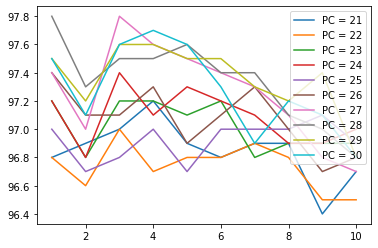

In [8]:
k = list(range(1, 11))
for i in range(20,30):
    plt.plot(k, val_arr[i ,0:10], label = f"PC = {i+1}")
plt.legend()

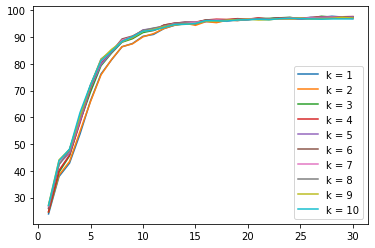

In [8]:
PCs = list(range(1, 31))
plt.plot(PCs, val_arr[:,0], label = "k = 1")
plt.plot(PCs, val_arr[:,1], label = "k = 2")
plt.plot(PCs, val_arr[:,2], label = "k = 3")
plt.plot(PCs, val_arr[:,3], label = "k = 4")
plt.plot(PCs, val_arr[:,4], label = "k = 5")
plt.plot(PCs, val_arr[:,5], label = "k = 6")
plt.plot(PCs, val_arr[:,6], label = "k = 7")
plt.plot(PCs, val_arr[:,7], label = "k = 8")
plt.plot(PCs, val_arr[:,8], label = "k = 9")
plt.plot(PCs, val_arr[:,9], label = "k = 10")
plt.legend()

In [8]:
def heatmap(arr, name = 'variable parts'):
    arr_df = pd.DataFrame(arr)
    sb.set(rc={"figure.dpi":200, "figure.figsize":(5, 5)})
    sb.heatmap(arr_df, cmap="viridis", annot=True, annot_kws={"size": 5}, square=True, cbar_kws={"shrink": 0.8})
    plt.title(f'Accuracy with variable {name}', fontsize =9)

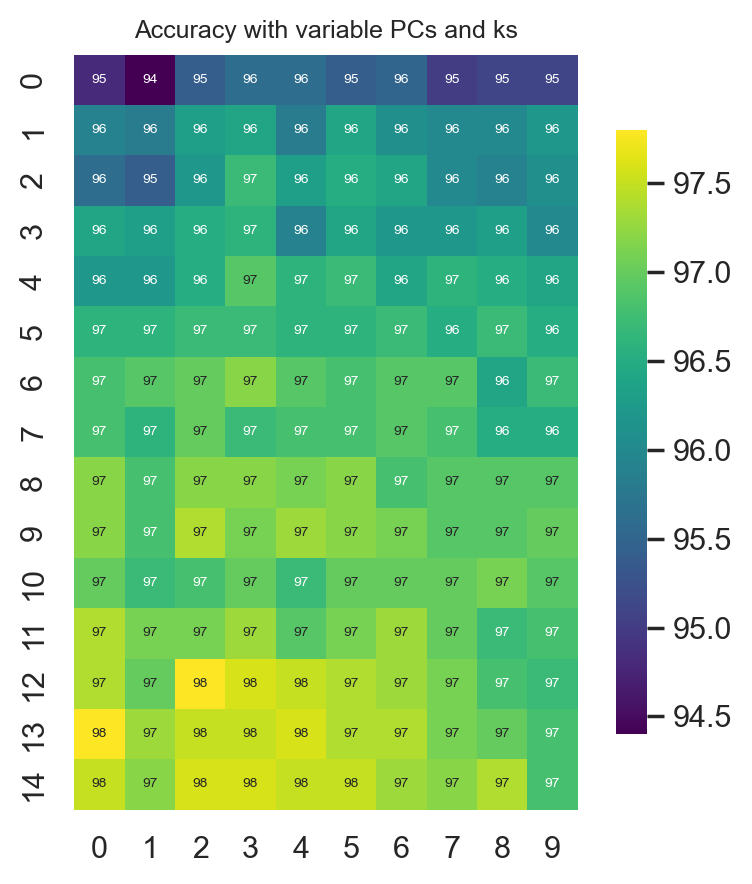

In [9]:
heatmap(val_arr[14:29,:], name = 'PCs and ks')